# Analyzing wind data using pandas

The first class excercise calculates some properties of a year of wind data. Data have been stored as 10 minute mean values (this is very common) and are stored in a CSV (comma separated variable) file.

My suggestion is to use Pandas dataframes to read in the data, make some plots and do the necessary analysis. Pandas is a very powerful tool for analysing data.

We start by importing the standard libraries that we will need:

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the file into the dataframe

The file is called 'wind_stats-readable_dt.csv' and the first few lines look like this:

SCAN_NAME,ws62,stdev62,wd60  
2011-01-01 00:00:00,3.65,0.18,255.43  
2011-01-01 00:10:00,3.79,0.15,260.83  
2011-01-01 00:20:00,3.74,0.17,260.23  
2011-01-01 00:30:00,3.25,0.21,269.83

Note that the first line contains the column names. The first column SCAN_NAME is actually a date-time that can be read directly by Pandas.

Using the pandas `read_csv()` function, we can read in the whole file in one line. You can use the `parse_dates` parameter to tell `read_csv()` that a column is date-time and then you can set this column as the index using the `index_col` parameter. 

Once the file is loaded you can just type the pandas dataframe name to `WindData` get a useful overview of the columns and the first and last scans.

In [3]:
WindData=pd.read_csv('wind_stats-readable_dt.csv',parse_dates=['SCAN_NAME'],index_col='SCAN_NAME')
WindData

,ws62,stdev62,wd60
SCAN_NAME,,,
2011-01-01 00:00:00,3.65,0.18,255.43
2011-01-01 00:10:00,3.79,0.15,260.83
2011-01-01 00:20:00,3.74,0.17,260.23
2011-01-01 00:30:00,3.25,0.21,269.83
2011-01-01 00:40:00,3.03,0.25,271.83
...,...,...,...
2011-12-31 23:10:00,6.26,0.70,165.93
2011-12-31 23:20:00,6.39,0.59,165.63
2011-12-31 23:30:00,6.79,0.61,167.43


## Calculating the turbulence intensity (TI) from existing columns

Pandas lets us make new columns that are derived from some of the other columns of the dataframe. For example, if we had a dataframe `Df` with two columns `A` and `B` we can make a new column `C` as the sum of these two in onew line:

`Df['C'] = Df['A'] + Df['B']`

Now we need to make a turbulence intensity (TI) that is simply, for each ten minutes, the wind speed standard deviation divided by the mean and multiplied by 100 to give it in percent. Figure out the code you need to add here..

In [11]:
WindData['TI']=(WindData['stdev62']/WindData['ws62'])*100
WindData

,ws62,stdev62,wd60,TI
SCAN_NAME,,,,
2011-01-01 00:00:00,3.65,0.18,255.43,4.931507
2011-01-01 00:10:00,3.79,0.15,260.83,3.957784
2011-01-01 00:20:00,3.74,0.17,260.23,4.545455
2011-01-01 00:30:00,3.25,0.21,269.83,6.461538
2011-01-01 00:40:00,3.03,0.25,271.83,8.250825
...,...,...,...,...
2011-12-31 23:10:00,6.26,0.70,165.93,11.182109
2011-12-31 23:20:00,6.39,0.59,165.63,9.233177
2011-12-31 23:30:00,6.79,0.61,167.43,8.983800


Pandas also has a describe() method that gives stats of all the fields:

In [12]:
WindData.describe()

,ws62,stdev62,wd60,TI
count,52560.000000,52560.000000,52560.000000,52560.000000
mean,6.115011,0.628923,175.825087,13.074100
std,3.717117,0.349155,76.455721,8.991359
min,0.240000,0.000000,0.030000,0.000000
25%,3.110000,0.350000,144.230000,7.767756
50%,5.500000,0.560000,177.430000,10.600353
75%,8.460000,0.850000,222.830000,15.344254
max,22.530000,3.850000,359.980000,94.736842


## Plotting the time series

Its very easy to plot the variables in a dataframe. Because we have told pandas that the index is date-time, the plots will be true time series. Here we will make 4 sub-plots. I have coded the first two. Add your code for plots 3 and 4 to plot the wind direction and turbulence intensity respectively.

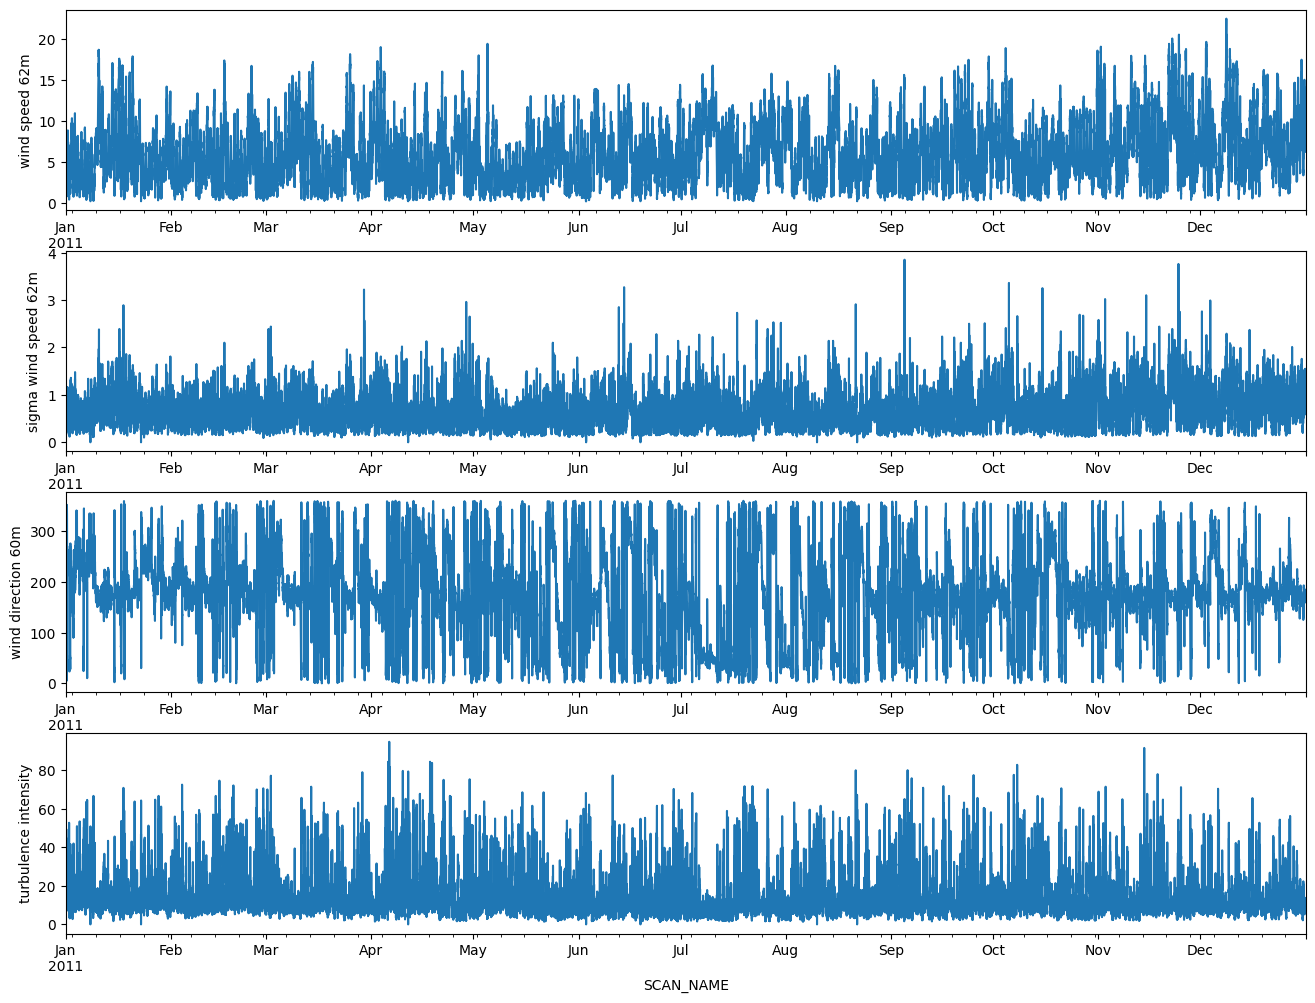

In [13]:
fig = plt.figure(figsize=(16, 12))
ax1=fig.add_subplot(411)
WindData['ws62'].plot(ax=ax1,ylabel="wind speed 62m")

ax2=fig.add_subplot(412)
WindData['stdev62'].plot(ax=ax2,ylabel="sigma wind speed 62m")

ax3=fig.add_subplot(413)
WindData['wd60'].plot(ax=ax3,ylabel="wind direction 60m")

ax4=fig.add_subplot(414)
WindData['TI'].plot(ax=ax4,ylabel="turbulence intensity")

plt.show()

## Making statistics on single columns

Making statistics on dataframe columns is easy. Just add append .count() or a .mean() method call to the column reference. For example `WindData['ws62'].count()` will return the number of (non-NAN) elements in the `ws62` column.
Write you own code here to print out the total number of samples, the mean speed and the mean turbulence intensity.

In [14]:
print(f'Num of samples {WindData['ws62'].count()}')
print(f'Mean speed {WindData['ws62'].mean()}')
print(f'Mean turbulence intensity {WindData['TI'].mean()}')

Num of samples 52560
Mean speed 6.115011035007611
Mean turbulence intensity 13.074099967447903


## Making a wind speed bin column

We very often need to analyse wind data in bins (ranges) of wind speed and wind direction. Here we will make a simple wind speed bin using just the integer part of the speed, as a new column in the data frame. We will use it a bit later.
Normally we would use the `math.floor()` function to give us the whole number part of the argument. Because we have an array of data, we need to use the equivalent numpy function `np.floor()`. Note that `floor()` functions actually return a `float` type (!) so we use the `.astype(int)` to force this into an integer (better and more logical for grouping by).

Fill in the code needed in the next cell.

In [15]:
WindData['speed_bin']= np.floor(WindData['ws62']).astype(int)
WindData

,ws62,stdev62,wd60,TI,speed_bin
SCAN_NAME,,,,,
2011-01-01 00:00:00,3.65,0.18,255.43,4.931507,3
2011-01-01 00:10:00,3.79,0.15,260.83,3.957784,3
2011-01-01 00:20:00,3.74,0.17,260.23,4.545455,3
2011-01-01 00:30:00,3.25,0.21,269.83,6.461538,3
2011-01-01 00:40:00,3.03,0.25,271.83,8.250825,3
...,...,...,...,...,...
2011-12-31 23:10:00,6.26,0.70,165.93,11.182109,6
2011-12-31 23:20:00,6.39,0.59,165.63,9.233177,6
2011-12-31 23:30:00,6.79,0.61,167.43,8.983800,6


## Making a wind direction bin

Quite often we need to sort wind data into direction bins to better understand how the wind behaves when it comes from a certain sector or even to exclude data from directions where the wind speed might be distrurbed.

Usually a direction bin will be much larger than one degree, often 15 or 30 degrees. It is usually desirable to centre the bin on a 'nice' direction like 30 or 90 degrees. 

Here we need a direction bin with a width of 30 degrees (so 12 bins) and centred +-15 degrees on either side of the nominal value (centre values 0, 30, 60, 90 etc.). Directions are often difficult because of the 0-360-0 numeric discontinuity (always be careful about mean values).

The `floor()` function is still the core of the method but now we need to manipulate the parameter value to give us both the required width and offset. Can you work out how to do this? 

Note that directions in the range 345-360 degrees should be in bin 0 (assuming 0..11 as the bin indecies). The `np.mod()` function can come in useful here. Hint -  `mod(370,12)` will give 0!

Figure out how to do this and put your code in the next cell.

In [16]:
WindData['dir_bin']=np.mod(np.floor((WindData['wd60']+15)/30).astype(int),12)
WindData

,ws62,stdev62,wd60,TI,speed_bin,dir_bin
SCAN_NAME,,,,,,
2011-01-01 00:00:00,3.65,0.18,255.43,4.931507,3,9
2011-01-01 00:10:00,3.79,0.15,260.83,3.957784,3,9
2011-01-01 00:20:00,3.74,0.17,260.23,4.545455,3,9
2011-01-01 00:30:00,3.25,0.21,269.83,6.461538,3,9
2011-01-01 00:40:00,3.03,0.25,271.83,8.250825,3,9
...,...,...,...,...,...,...
2011-12-31 23:10:00,6.26,0.70,165.93,11.182109,6,6
2011-12-31 23:20:00,6.39,0.59,165.63,9.233177,6,6
2011-12-31 23:30:00,6.79,0.61,167.43,8.983800,6,6


## Using groupby() to calculate bin statistics

Now we have these speed and direction bins, we can use the pandas groupby functions to look at the various properties per bin. To start with, lets do a groupby('field').mean() on the speed bin. The results go in variable SpeedBinProps that can be plotted just as before.
The first plot shows if you got the binning right! Did you?

Now we can easily see how the turbulence intesity TI varies with mean speed. Add a line of code to make this plot.


In [ ]:
SpeedBinProps=WindData.groupby('speed_bin').mean()

SpeedBinProps['ws62'].plot() plt.show()

Add a line here to plot the turbulence intensity as a function of speed bin.

## Looking at wind properties as a function of wind direction

We also have made a wind direction (sector) bin. Now we can use this to see how the various mean wind properties vary with wind direction.

First make a variable DirBinProps that contains the mean properties per direction bin:

In [ ]:
DirBinProps=your code here
DirBinProps

Which direction bin has the highest mean wind speed?

What is wrong with the mean direction in bin 0? 

Make some plots to visualise the mean speed and turnulence intensity per direction bin. I haven't yet figured out how to plot these as a polar plots but maybe you can?

In [ ]:
Code for plots of mean wind speed and turbulence intensity per direction bin. Polar plots are nice if you can!

## Using groupby() to count 

We often need to know how many elements we have in a particular bin. For this we can use the `grouby('field').count()` aggregate functions. 

Make a variable DirBinCounts containing the number of elements in each discrete direction bin.

In [ ]:
DirBinCounts=your code here
DirBinCounts

For which direction does the wind most often blow? 

Can anybody make a wind rose out of this data?

## An important feature for a wind resource that we missed?
Go back and look at the time series of wind speed. Do you notice anything remarkable (maybe you need to zoom a bit)?

Hint: You can make an hour of day bin using `WindData['hour']=WindData.index.hour()`. Can you use this to find what we missed?